# CNN (CONVOLUTIONAL Neural Network) :

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 reshape (Reshape)           (None, 6, 1)              0         
                                                                 
 conv1d (Conv1D)             (None, 4, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                             

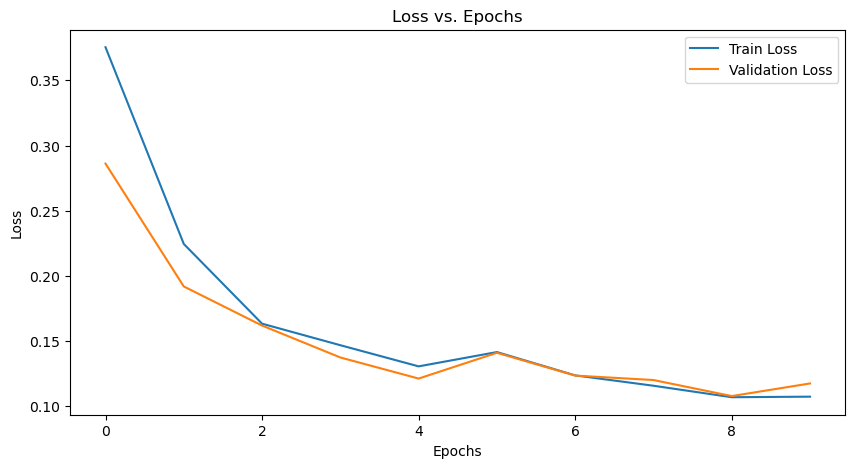

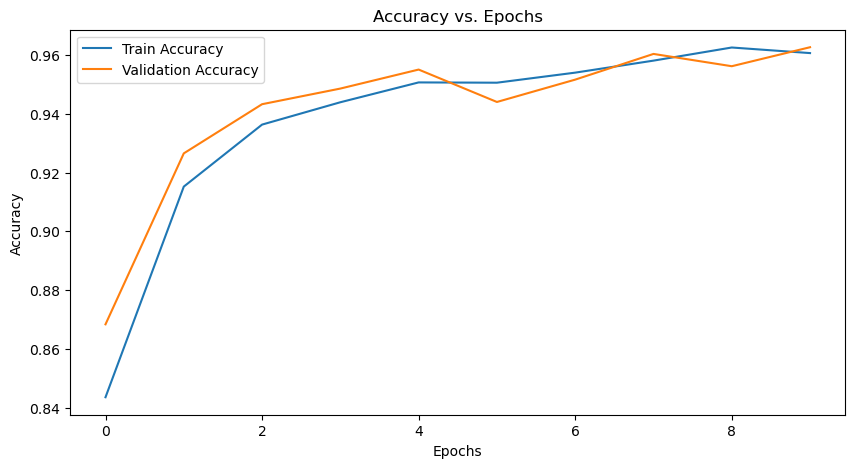

103/103 [==============================] - 1s 2ms/step
Accuracy: 0.956177723676202
Precision: 0.9549604382227632
Recall: 0.9572910311165345
F1 Score: 0.9561243144424132
AUC Score: 0.96


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Reshape
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Chargement du dataset
df = pd.read_csv('../final_cleaned.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convertissez vos données en tableaux NumPy si elles ne le sont pas déjà
X_train = np.array(X_train)
y_train = np.array(y_train)
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Assurez-vous que input_shape est défini correctement
input_shape = (X_train.shape[1],)

# Créez le modèle CNN avec l'architecture spécifiée
inp = Input(shape=input_shape)
x = Reshape((input_shape[0], 1))(inp)  # Conversion en une image unidimensionnelle
x = Conv1D(32, kernel_size=3, activation="relu")(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
out = Dense(1, activation="sigmoid")(x)

model = Model(inp, out)

# Affichez l'architecture du modèle avec le détail des couches
model.summary()

# Assurez-vous que 'opt' est défini correctement comme optimiseur
opt = 'adam'

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Entraînez le modèle sur l'ensemble d'entraînement avec validation
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

# Évaluez le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc:.2f}")

# Sauvegardez le DataFrame dans un fichier CSV
cnn_results = pd.DataFrame([['CNN', acc, prec, rec, f1, auc]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
cnn_results.to_csv('../evaluations/cnn_results.csv', index=False)


In [2]:
cnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,CNN,0.956178,0.95496,0.957291,0.956124,0.95618


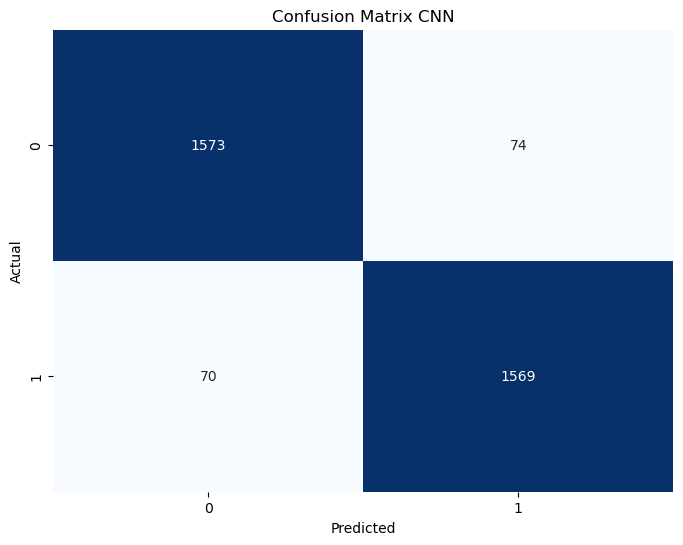

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix CNN')
plt.show()